Data Science Classification Challenge

Project Overview

This capstone project challenges students to develop and optimize machine learning models for predicting heart disease based on diagnostic test results. Students will work with clinical diagnostic data to build classification models that can assist healthcare professionals in early detection and risk assessment.

Problem Statement

Primary Question: Can we accurately predict the presence of heart disease in patients based on their diagnostic test results and clinical measurements?

Business Context: Heart disease remains one of the leading causes of death globally. Early detection through diagnostic screening can significantly improve patient outcomes and reduce healthcare costs. This project simulates a real-world scenario where data scientists work with medical professionals to develop predictive models for clinical decision support.

Challenge: Given a patient's diagnostic test results (blood pressure, cholesterol levels, ECG results, exercise capacity, etc.), predict whether the patient has heart disease or not.

---

Project Goals

Primary Objectives

1. Model Development: Build and compare multiple classification algorithms (Decision Trees, Random Forest, Logistic Regression, Support Vector Machines)

2. Performance Optimization: Use grid search with k-fold cross-validation to optimize model hyperparameters

3. Model Evaluation: Assess models using appropriate metrics for medical diagnosis (accuracy, precision, recall, F1-score, ROC-AUC)

4. Feature Analysis: Identify the most important diagnostic indicators for heart disease prediction

Learning Outcomes

● Master classification algorithms and their appropriate use cases

● Understand hyperparameter tuning and cross-validation techniques

● Learn to evaluate models in high-stakes domains (healthcare)

● Practice feature importance analysis and model interpretation

● Develop skills in presenting analytical findings to stakeholders

---

Dataset Description

Target Variable

● heart_disease: Binary classification (0 = No heart disease, 1 = Heart disease present)

Feature Categories

Demographic Information

● age: Patient age (years)

● sex: Gender (0 = Female, 1 = Male)

Clinical Measurements

● chest_pain_type: Type of chest pain (0-3: Typical angina, Atypical angina, Non-anginal pain, Asymptomatic)

● resting_blood_pressure: Resting blood pressure (mm Hg)

● cholesterol: Serum cholesterol level (mg/dl)

● fasting_blood_sugar: Fasting blood sugar > 120 mg/dl (0 = False, 1 = True)

Diagnostic Test Results

● resting_ecg: Resting electrocardiographic results (0-2)

● max_heart_rate: Maximum heart rate achieved during exercise

● exercise_induced_angina: Exercise-induced angina (0 = No, 1 = Yes)

● st_depression: ST depression induced by exercise relative to rest

● st_slope: Slope of peak exercise ST segment (0-2)

● num_major_vessels: Number of major vessels colored by fluoroscopy (0-3)

● thalassemia: Thalassemia test result (0-3)

---

Shape: (400, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float6

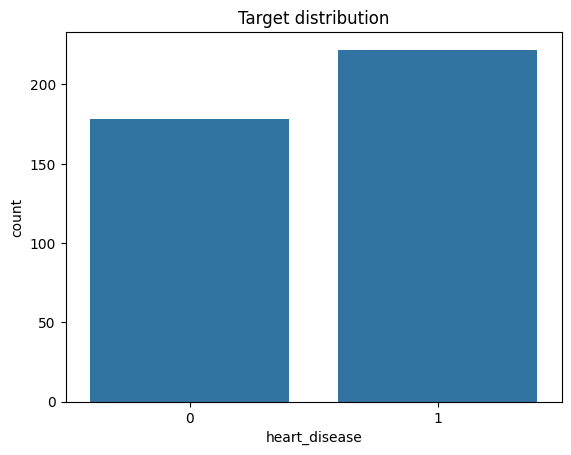

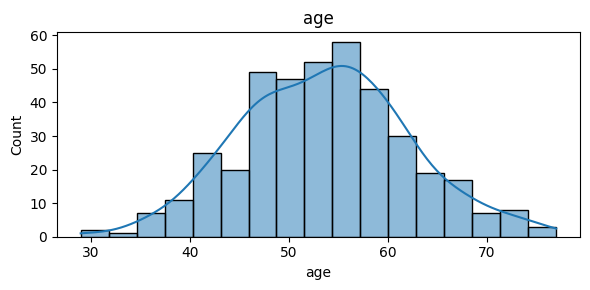

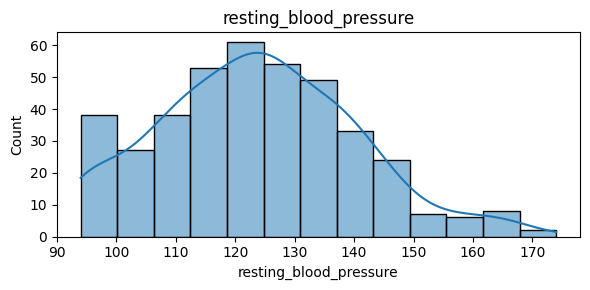

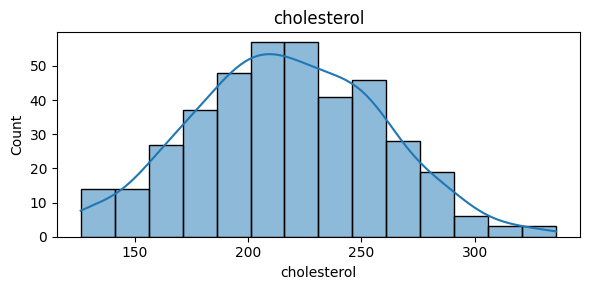

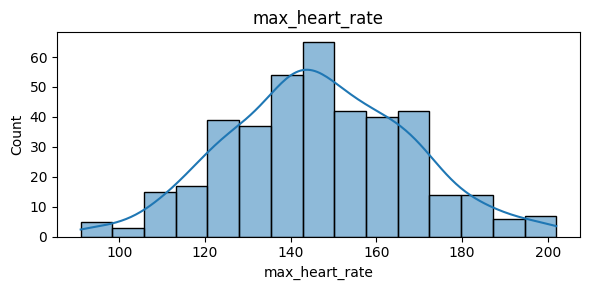

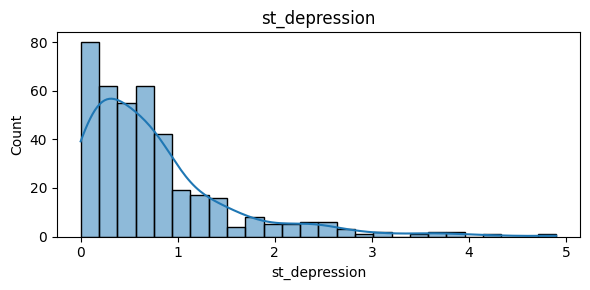

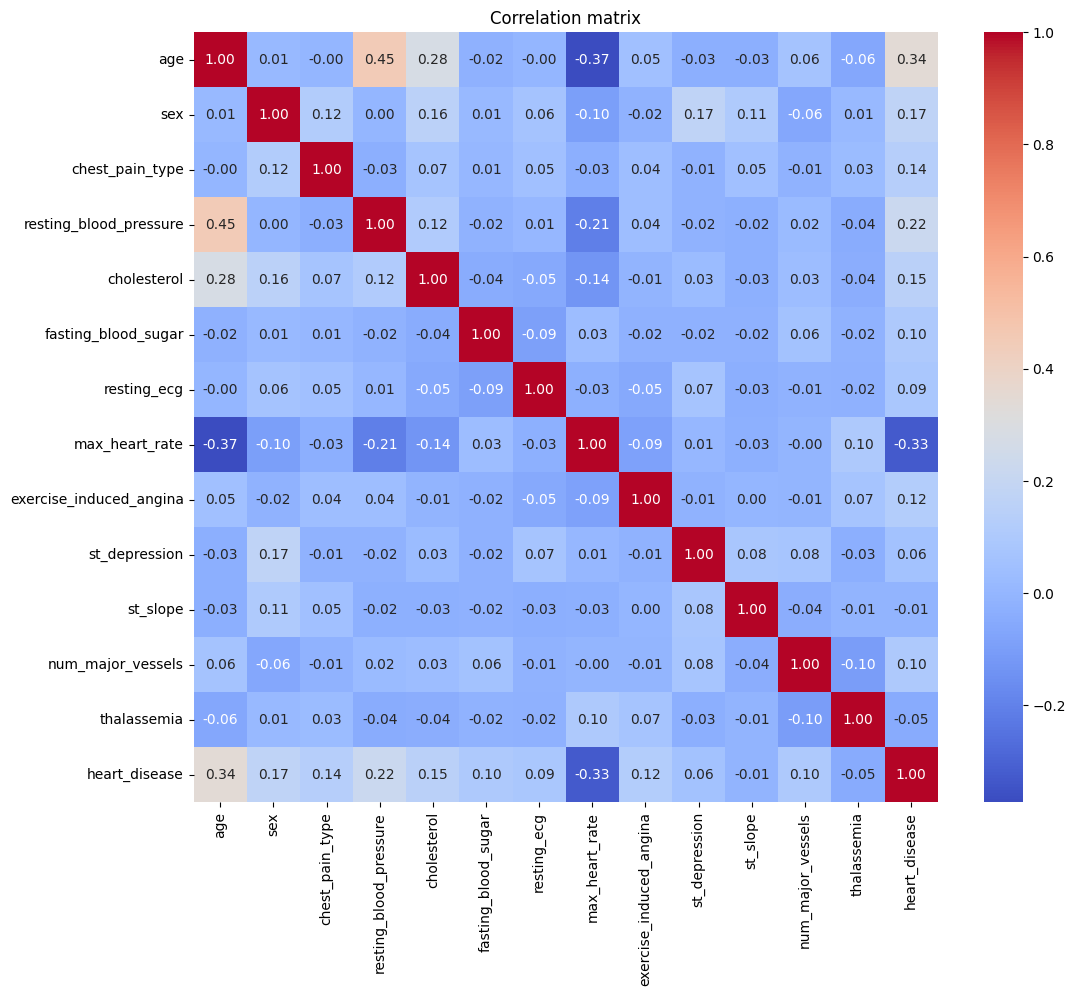

Train shape: (320, 13) Test shape: (80, 13)
Evaluating DecisionTree with 5-fold CV
accuracy: 0.606 (+/- 0.057)
precision: 0.642 (+/- 0.053)
recall: 0.663 (+/- 0.049)
f1: 0.652 (+/- 0.050)
roc_auc: 0.599 (+/- 0.058)


Evaluating RandomForest with 5-fold CV
accuracy: 0.672 (+/- 0.052)
precision: 0.698 (+/- 0.049)
recall: 0.730 (+/- 0.057)
f1: 0.712 (+/- 0.042)
roc_auc: 0.728 (+/- 0.063)


Evaluating LogisticRegression with 5-fold CV
accuracy: 0.684 (+/- 0.059)
precision: 0.719 (+/- 0.062)
recall: 0.724 (+/- 0.061)
f1: 0.719 (+/- 0.045)
roc_auc: 0.743 (+/- 0.044)


Evaluating SVM with 5-fold CV
accuracy: 0.675 (+/- 0.057)
precision: 0.694 (+/- 0.049)
recall: 0.747 (+/- 0.038)
f1: 0.720 (+/- 0.043)
roc_auc: 0.716 (+/- 0.068)


Training DecisionTree
DecisionTree Test metrics:
Accuracy: 0.675
Precision: 0.6875
Recall: 0.75
F1: 0.717391304347826
ROC-AUC: 0.6666666666666666

Confusion matrix:
[[21 15]
 [11 33]]

Classification report:
               precision    recall  f1-score   support

   

In [ ]:
# %% [markdown]
# Heart Disease Detection — Capstone Project

import os
import time
import pickle
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, classification_report, confusion_matrix, roc_curve)
from sklearn.inspection import permutation_importance

# %% [markdown]
# ## 1 — Load data and initial inspection

# %%
# Configuration
DATA_PATH = Path('heart_disease_dataset.csv')  # change to your CSV file
RANDOM_STATE = 42
TEST_SIZE = 0.2
OUTPUT_DIR = Path('output')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# %%
# Load dataset
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Please place the CSV file there.")

df = pd.read_csv(DATA_PATH)
print('Shape:', df.shape)
print(df.info())

# Quick head
print(df.head())

# %% [markdown]
# ## 1.1 Descriptive statistics and missing values

# %%
print(df.describe(include='all').T)
print('\nMissing values by column:\n', df.isnull().sum())

# %% [markdown]
# ## 1.2 Target distribution and class balance

# %%
print('\nTarget distribution:')
print(df['heart_disease'].value_counts())

sns.countplot(x='heart_disease', data=df)
plt.title('Target distribution')
plt.show()

# %% [markdown]
# ## 1.3 Visualizations: distributions and correlations

# %%
# Histograms for continuous features
continuous = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']
for col in continuous:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# %% [markdown]
# ## 1.4 Handle outliers (basic) — demonstrate winsorization option

# %%
from scipy.stats import mstats

# winsorize cholesterol as an example (cap extreme values at 1st and 99th percentiles)
for col in ['cholesterol', 'resting_blood_pressure']:
    df[col] = mstats.winsorize(df[col], limits=[0.01, 0.01])

# %% [markdown]
# ## 1.5 Preprocessing: encoding and scaling

# %%
# Define feature lists (based on project brief)
cat_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']
num_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']

target = 'heart_disease'

# Basic imputation strategy: fill numerical NaNs with median, categorical with mode
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# %% [markdown]
# ## 1.6 Train-test split

# %%
X = df[num_features + cat_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

# %% [markdown]
# ## 2 — Baseline model development (pipelines)

# %%
# Define model pipelines
models = {
    'DecisionTree': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=RANDOM_STATE))]),
    'RandomForest': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))]),
    'LogisticRegression': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))]),
    'SVM': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True, random_state=RANDOM_STATE))])
}

# %%
# Function to evaluate model with cross-validation
def evaluate_model_cv(name, model, X, y, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    print(f"Evaluating {name} with {cv}-fold CV")
    scores = {s: cross_val_score(model, X, y, cv=skf, scoring=s, n_jobs=-1) for s in scoring}
    results = {s: (scores[s].mean(), scores[s].std()) for s in scores}
    for metric, (mean, std) in results.items():
        print(f"{metric}: {mean:.3f} (+/- {std:.3f})")
    return results

# %%
# Baseline evaluation
baseline_results = {}
for name, pipeline in models.items():
    baseline_results[name] = evaluate_model_cv(name, pipeline, X_train, y_train, cv=5)
    print('\n')

# %% [markdown]
# ## 2.1 Train baseline models and evaluate on test set

# %%
trained_models = {}
for name, pipeline in models.items():
    print('Training', name)
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline

    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1]

    print(name, 'Test metrics:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))
    try:
        print('ROC-AUC:', roc_auc_score(y_test, y_proba))
    except Exception:
        print('ROC-AUC: could not compute (no probabilities)')
    print('\nConfusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification report:\n', classification_report(y_test, y_pred))
    print('\n' + '-'*60 + '\n')

# %% [markdown]
# ## 3 — Hyperparameter optimization (GridSearchCV)

# %%
# Parameter grids from the specification
dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [1000, 2000]
}

svm_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

param_grids = {
    'DecisionTree': dt_param_grid,
    'RandomForest': rf_param_grid,
    'LogisticRegression': lr_param_grid,
    'SVM': svm_param_grid
}

# %%
# Function to run GridSearchCV
def run_grid_search(name, pipeline, param_grid, X, y, cv=5, scoring='roc_auc', n_jobs=-1):
    print(f"Running GridSearch for {name} — scoring={scoring}")
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=skf, scoring=scoring, n_jobs=n_jobs, verbose=1)
    start = time.time()
    grid.fit(X, y)
    elapsed = time.time() - start
    print(f"Best score: {grid.best_score_:.4f} — time: {elapsed/60:.2f} min")
    print('Best params:', grid.best_params_)
    return grid

# %%
# Run grid searches — note: can be time-consuming depending on data size
best_grids = {}
for name in ['DecisionTree', 'RandomForest', 'LogisticRegression', 'SVM']:
    grid = run_grid_search(name, models[name], param_grids[name], X_train, y_train, cv=5, scoring='roc_auc')
    best_grids[name] = grid
    # Save best estimator
    with open(OUTPUT_DIR / f'best_grid_{name}.pkl', 'wb') as f:
        pickle.dump(grid, f)

# %% [markdown]
# ## 3.1 Evaluate optimized models on test set

# %%
optimized_models = {}
for name, grid in best_grids.items():
    best = grid.best_estimator_
    optimized_models[name] = best
    y_pred = best.predict(X_test)
    y_proba = best.predict_proba(X_test)[:,1]

    print(name, 'Optimized Test metrics:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))
    print('ROC-AUC:', roc_auc_score(y_test, y_proba))
    print('\nConfusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification report:\n', classification_report(y_test, y_pred))
    print('\n' + '-'*60 + '\n')

# %% [markdown]
# ## 4 — Feature importance and interpretation

# %%
# For tree-based models: extract feature names after preprocessing
def get_feature_names(preprocessor):
    # numeric features remain same
    num_feats = num_features
    # one-hot encoder feature names
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    try:
        cat_names = ohe.get_feature_names_out(cat_features).tolist()
    except Exception:
        cat_names = ohe.get_feature_names(cat_features).tolist()
    return num_feats + cat_names

# Example using RandomForest optimized model
if 'RandomForest' in optimized_models:
    rf_best = optimized_models['RandomForest']
    rf_clf = rf_best.named_steps['classifier']
    feat_names = get_feature_names(rf_best.named_steps['preprocessor'])
    importances = rf_clf.feature_importances_
    fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False)
    print(fi_df.head(20))

    plt.figure(figsize=(8,6))
    sns.barplot(x='importance', y='feature', data=fi_df.head(20))
    plt.title('Top 20 feature importances (Random Forest)')
    plt.tight_layout()
    plt.show()

# Permutation importance (model-agnostic)
if 'LogisticRegression' in optimized_models:
    lr_best = optimized_models['LogisticRegression']
    print('Permutation importance on logistic regression...')
    X_test_trans = lr_best.named_steps['preprocessor'].transform(X_test)
    perm = permutation_importance(lr_best.named_steps['classifier'], X_test_trans, y_test, n_repeats=10, random_state=RANDOM_STATE)
    # map back names
    feat_names = get_feature_names(lr_best.named_steps['preprocessor'])
    perm_df = pd.DataFrame({'feature': feat_names, 'importance_mean': perm.importances_mean}).sort_values('importance_mean', ascending=False)
    print(perm_df.head(20))

# %% [markdown]
# ## 5 — Save final models and preprocessing objects

# %%
# Choose a final model (example: best by ROC-AUC on test set). We'll pick RandomForest if available.
final_model_name = None
if optimized_models:
    # naive selection by test ROC-AUC
    best_score = -1
    for name, model in optimized_models.items():
        try:
            y_proba = model.predict_proba(X_test)[:,1]
            score = roc_auc_score(y_test, y_proba)
            if score > best_score:
                best_score = score
                final_model_name = name
        except Exception:
            continue

print('Selected final model:', final_model_name, 'with ROC-AUC:', best_score)

if final_model_name:
    final_model = optimized_models[final_model_name]
    with open(OUTPUT_DIR / 'final_model_pipeline.pkl', 'wb') as f:
        pickle.dump(final_model, f)
    print('Saved final_model_pipeline.pkl')

    # Save model metadata
    metadata = {
        'model_name': final_model_name,
        'roc_auc_test': float(best_score),
        'features': num_features + cat_features
    }
    pd.Series(metadata).to_json(OUTPUT_DIR / 'final_model_metadata.json')






